# 1. Thư viện cần thiết

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from datetime import datetime, date

In [2]:
df = pd.read_csv('ETH_Dataset.csv')
df['ClosingPrice'] = df['Closing Price (USD)']/10000
df.pop('Currency')
df.pop('24h Open (USD)')
df.pop('24h High (USD)')
df.pop('24h Low (USD)')
df.pop('Closing Price (USD)')
df

,Date,ClosingPrice
0,2020-06-01,0.023125
1,2020-06-02,0.025006
2,2020-06-03,0.023731
3,2020-06-04,0.024452
4,2020-06-05,0.024341
...,...,...
381,2021-06-17,0.238713
382,2021-06-18,0.234291
383,2021-06-19,0.220833
384,2021-06-20,0.218141


### Vẽ sơ đồ minh họa

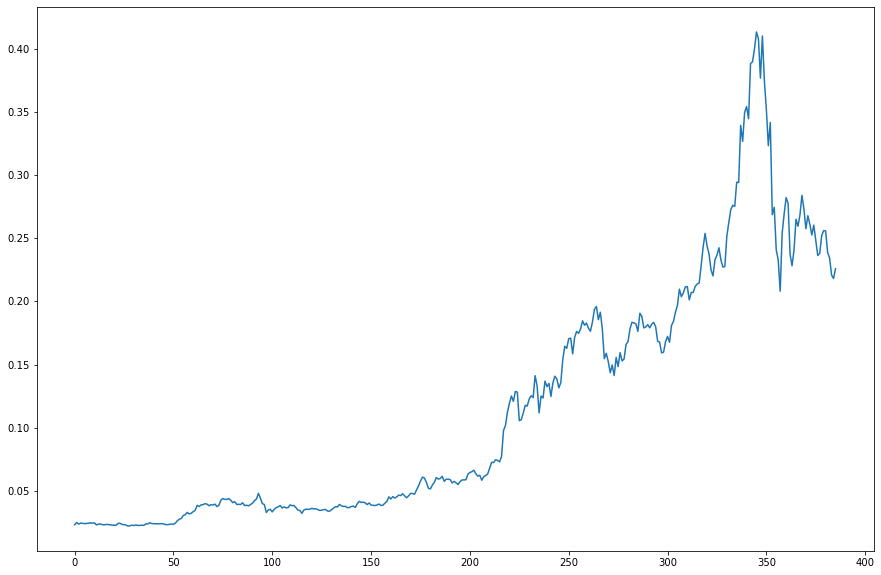

In [3]:
df['ClosingPrice'].plot(kind='line',figsize=(15, 10))

plt.show()

# 2. Tiền xử lý và Chia train/test

In [4]:
df["timestamp"] = pd.to_datetime(df.Date).astype(np.int64)
df

,Date,ClosingPrice,timestamp
0,2020-06-01,0.023125,1590969600000000000
1,2020-06-02,0.025006,1591056000000000000
2,2020-06-03,0.023731,1591142400000000000
3,2020-06-04,0.024452,1591228800000000000
4,2020-06-05,0.024341,1591315200000000000
...,...,...,...
381,2021-06-17,0.238713,1623888000000000000
382,2021-06-18,0.234291,1623974400000000000
383,2021-06-19,0.220833,1624060800000000000
384,2021-06-20,0.218141,1624147200000000000


In [5]:
df.pop('Date')
df

,ClosingPrice,timestamp
0,0.023125,1590969600000000000
1,0.025006,1591056000000000000
2,0.023731,1591142400000000000
3,0.024452,1591228800000000000
4,0.024341,1591315200000000000
...,...,...
381,0.238713,1623888000000000000
382,0.234291,1623974400000000000
383,0.220833,1624060800000000000
384,0.218141,1624147200000000000


In [6]:
df = df.values
X = df[:,1].reshape(-1,1)
Y = df[:,0:1]

In [7]:
train_size = int(len(df) * 0.80)
test_size = len(df) - train_size

### Chia train/test

In [8]:
trainX, testX = X[0:train_size,:], X[train_size:len(df),:]
print(len(trainX), len(testX))

308 78


In [9]:
trainY, testY = Y[0:train_size,:], Y[train_size:len(df),:]
print(len(trainY), len(testY))

308 78


# 3. Chạy Model

In [10]:
#RBF
rbf_svr = SVR(kernel='rbf')
rbf_svr.fit(trainX,trainY)

c:\users\minh nhut\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [11]:
SVR_predict = rbf_svr.predict(testX)

In [12]:
SVR_predict

array([0.11589992, 0.11589992, 0.11589992, 0.11589992, 0.11589992,
       0.11589992, 0.11589992, 0.11589992, 0.11589992, 0.11589992,
       0.11589992, 0.11589992, 0.11589992, 0.11589992, 0.11589992,
       0.11589992, 0.11589992, 0.11589992, 0.11589992, 0.11589992,
       0.11589992, 0.11589992, 0.11589992, 0.11589992, 0.11589992,
       0.11589992, 0.11589992, 0.11589992, 0.11589992, 0.11589992,
       0.11589992, 0.11589992, 0.11589992, 0.11589992, 0.11589992,
       0.11589992, 0.11589992, 0.11589992, 0.11589992, 0.11589992,
       0.11589992, 0.11589992, 0.11589992, 0.11589992, 0.11589992,
       0.11589992, 0.11589992, 0.11589992, 0.11589992, 0.11589992,
       0.11589992, 0.11589992, 0.11589992, 0.11589992, 0.11589992,
       0.11589992, 0.11589992, 0.11589992, 0.11589992, 0.11589992,
       0.11589992, 0.11589992, 0.11589992, 0.11589992, 0.11589992,
       0.11589992, 0.11589992, 0.11589992, 0.11589992, 0.11589992,
       0.11589992, 0.11589992, 0.11589992, 0.11589992, 0.11589

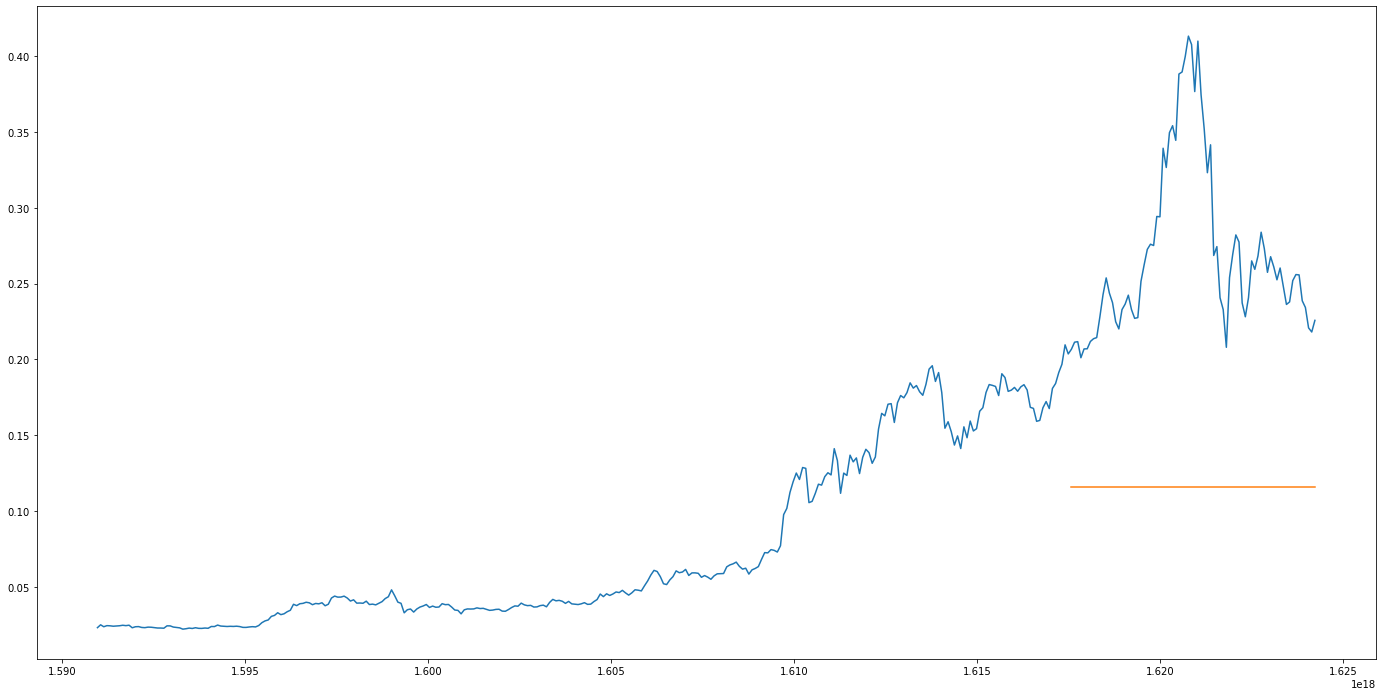

In [13]:
fig= plt.figure(figsize=(24,12))
plt.plot(X,Y)
plt.plot(testX,SVR_predict)
plt.show()

# 4.  Đánh Giá mô hình

In [14]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [15]:
#MAPE
mean_absolute_percentage_error(testY, SVR_predict.reshape(-1,1))

55.43663768439766

In [17]:
#RMSE
import math
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(testY, SVR_predict.reshape(-1,1))
RMSE = math.sqrt(MSE)
print(RMSE)

0.16370453415409023
